##**ABOUT THE DATASET**
---
- `DESCRIPTION: ` This dataset provides information about the passengers aboard the RMS Titanic, which sank in the North Atlantic Ocean in 1912 after colliding with an iceberg.
- `CONTENT: ` Each passenger (row) has values for various attributes, including survival status, class, name, gender, age, number of siblings/spouses aboard, number of parents/children aboard, ticket number, fare, cabin, and port of embarkation.
- `ACKNOWLEDGEMENTS:` This information is derived from the original passenger lists of the Titanic. The dataset has been made available for educational and analytical purposes, allowing data scientists to explore and model real-world data.
- `INSPIRATION: ` The Titanic dataset has been widely used in the data science community for learning and competitions. It provides a compelling real-world scenario for developing predictive models and understanding the factors that contributed to survival during the disaster.
- `TASK: ` We intend to create an Exploratory Data Analysis (EDA) on this dataset. The EDA will serve as a foundation for Data Wrangling techniques aimed at cleaning and normalizing the data. We will meticulously document each step, ultimately drawing meaningful conclusions from the dataset.
---


# <u>**Importing the Libraries**</u>


1.   <u>Pandas</u> : Data manipulation and Analysis Library.
2.   <u>Numpy</u> : Numerical computing library
3.   <u>Seaborn</u> : Statistical data visualization library.
4.   <u>Matplotlib</u> : Data Visualization Library


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split




# **<u>Data Loading and Exploration and Cleaning</u>**
↪ Load the csv file with the pandas

 ↪ creating the dataframe and understanding the data present in the dataset using pandas

In [ ]:
df=pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

<u>*Viewing the header of the data*<u/>

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- We'll have a look at the total of null values in the dataset.
- For this we'll use a function `isnull.sum()`

In [ ]:
 df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- We are gonna have a look at the total number of survived passengers.
- For that we will use the function `value_counts`


In [ ]:
 df['Survived'].value_counts()[0]

549

<u>NOTE:</u> There are a total of 549 survived passengers.

In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

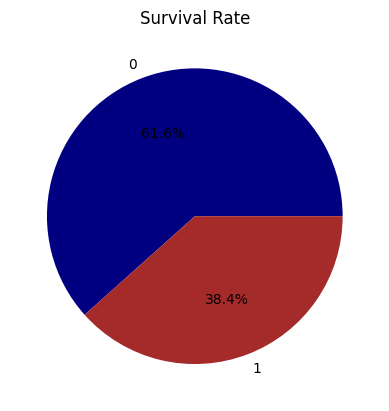

In [ ]:
plt.pie(df['Survived'].value_counts(), labels = df['Survived'].unique(), autopct='%1.1f%%', colors=['navy', 'brown'])
plt.title('Survival Rate')
plt.show()

Q- Why are we using pie chart?
- A- We are using pie chart because it offers a clear, concise, simple comparison and visually appealing way to convey the distribution of outcomes in the Titanic dataset.

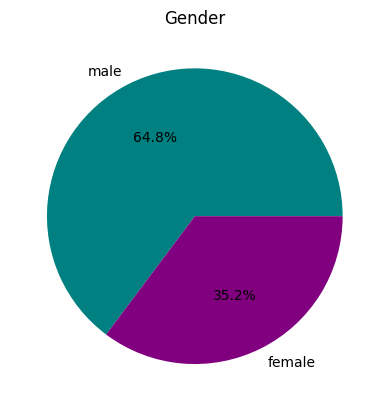

In [ ]:
plt.pie(df['Sex'].value_counts(), labels = df['Sex'].unique(), autopct='%1.1f%%', colors=['teal', 'purple'])
plt.title('Gender')
plt.show()

- Used pie chart to visualize data for easy comparison.


<Axes: xlabel='Survived', ylabel='count'>

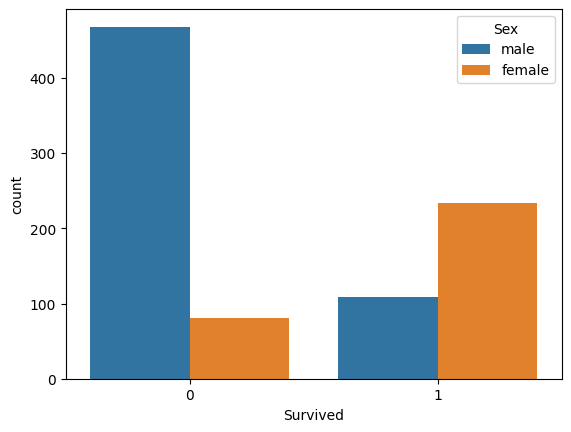

In [ ]:
sns.style=('white grid')
sns.countplot(x='Survived',hue='Sex',data=df)

- We used bar plot to see how many males and females survived and did not survive.
- Orange color shows how many females did not make it and how many survived.
- Blue color shows the number of males survived and did not survive.


---


- This code provides a simple summary of the gender distribution among the passengers aboard the Titanic, highlighting the total number of passengers as well as the number of male and female passengers separately.

In [ ]:
male_passengers = (df["Sex"]== 'male').sum()
female_passengers = (df["Sex"]== 'female').sum()
total_passengers = male_passengers + female_passengers
print("total number of passengers embarked: ", total_passengers )
print("number of male passengers embarked: ", male_passengers)
print("number of female passengers embarled: ", female_passengers)

total number of passengers embarked:  891
number of male passengers embarked:  577
number of female passengers embarled:  314


In [ ]:
# min number of age
print("the age of the youngest passenger was",df["Age"].min()*12, "months")
print("the age of the oldest passenger was",df["Age"].max(), "years")

the age of the youngest passenger was 5.04 months
the age of the oldest passenger was 80.0 years



- after looking at the dataset we can see that the age column had alot if empty values so se took the average if the age column and filled the age column with dummy values or imputations and after looking at the pclass we can see that pclass1 mostly had people around age 37 same is the case with pclass2 and pclass3 which had average age of 28 and 24 respectively.

In [ ]:
def clean_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

In [ ]:
df['Age']=df[['Age','Pclass']].apply(clean_age,axis=1)

<Axes: >

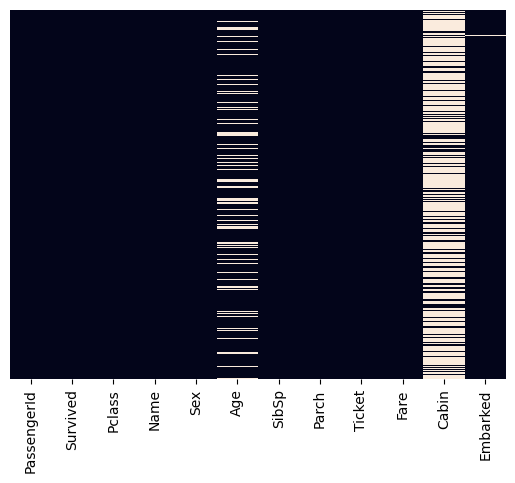

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

- now we can see that there are no empty cells in age column

<Axes: >

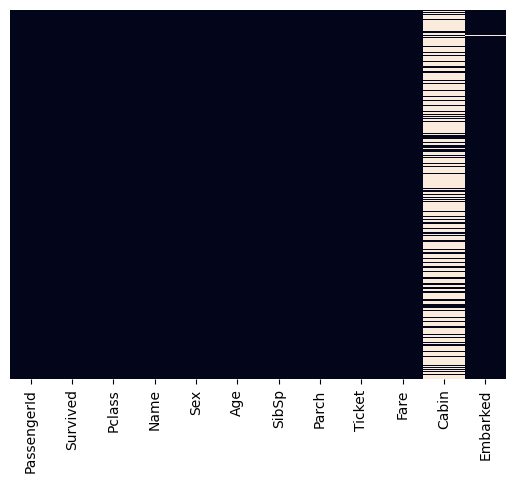

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## **Insight #1**
---
- We'll see how many of the survived passengers were the passengers of class 1, 2 and 3.
- For that we will use the columns `Survived` and `Pclass`.
- Also we will use the data visualization technique.

In [ ]:
# number of passengers who did and did not survive in each class
df["Survived"].value_counts(sort = 0)
print("passengers who didn't survive Pclass 1", df[df["Pclass"]== 1]["Survived"].value_counts())
print("passengers who didn't survive Pclass 2",df[df["Pclass"]== 2]["Survived"].value_counts())
print("passengers who didn't survive Pclass 3",df[df["Pclass"]== 3]["Survived"].value_counts())

passengers who didn't survive Pclass 1 Survived
1    136
0     80
Name: count, dtype: int64
passengers who didn't survive Pclass 2 Survived
0    97
1    87
Name: count, dtype: int64
passengers who didn't survive Pclass 3 Survived
0    372
1    119
Name: count, dtype: int64


##**DATA VISUALIZATION**
---
- Using data visualization to visualize the data for the abpve insight.
- Using bar graph to see how many survived and did not survive based on the passenger class `Pclass` column.


<Axes: xlabel='Survived', ylabel='count'>

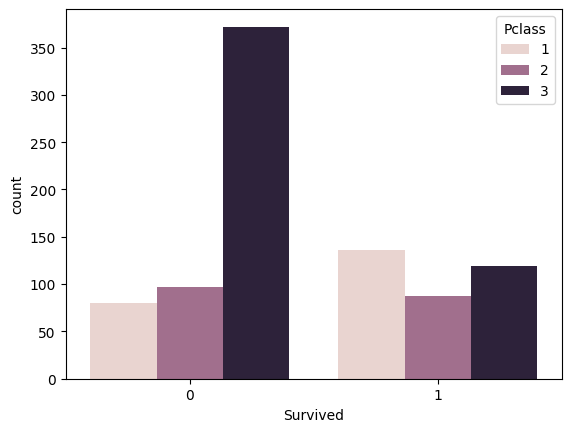

In [ ]:
sns.style=('white grid')
sns.countplot(x='Survived',hue='Pclass',data=df)

Reason for using bar graph?
-  Bar graphs offer a versatile and effective means of data representation.
Whether it's comparing categories, visualizing frequency data, or emphasizing magnitude differences.

##**INSIGHT #2 + DATA VISUALIZATION**
---
- For this insight we are looking at the distribution of ages.
- This shows how passengers were distributed among different ages.


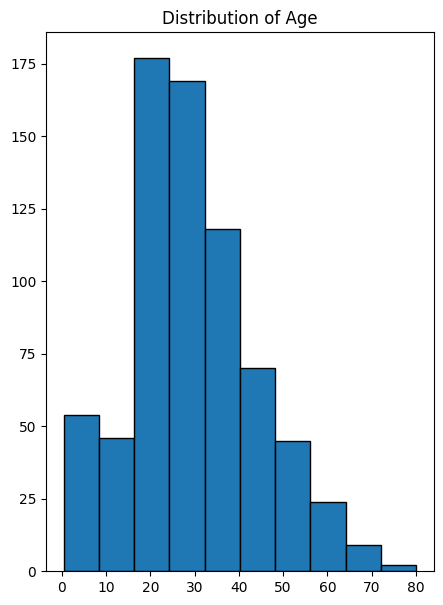

In [ ]:
plt.figure(figsize=(5,7))
plt.hist(df['Age'],edgecolor = 'black')
plt.title("Distribution of Age")
plt.show()

In [ ]:
df['Pclass'].unique()

array([3, 1, 2])

##**INSIGHT #3 + DATA VISUALIZATION**
---
- It shows the stats of fare of `Pclass 1`.
- The describe() function is applied to the fare_1st_class Series to compute descriptive statistics, such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.
- Overall, this code filters the DataFrame to isolate data related to first-class passengers, computes descriptive statistics for their fares, and generates a histogram to visualize the distribution of fares among first-class passengers.


count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64


Text(0, 0.5, 'Density')

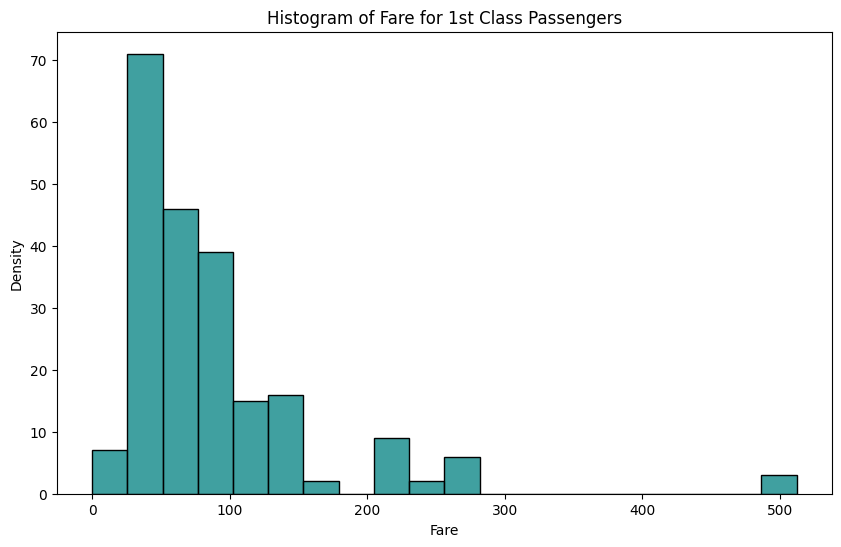

In [ ]:
first_class = df['Pclass'] == 1
fare_1st_class = df[first_class]['Fare']

fare_stats_1st_class = fare_1st_class.describe()
print(fare_stats_1st_class)

plt.figure(figsize=(10, 6))
sns.histplot(fare_1st_class,  bins=20, color='teal')
plt.title('Histogram of Fare for 1st Class Passengers')
plt.xlabel('Fare')
plt.ylabel('Density')



#Reason for using histogram
-  histograms are valuable tools for exploring the distributional properties of data and gaining insights into its characteristics, making them widely used in exploratory data analysis and statistical analysis.
---


- It shows the stats of fare of `Pclass 2`.
- The describe() function is applied to the fare_2nd_class Series to compute descriptive statistics, such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.
- Overall, this code filters the DataFrame to isolate data related to second-class passengers, computes descriptive statistics for their fares, and generates a histogram to visualize the distribution of fares among second-class passengers.

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64


Text(0, 0.5, 'Density')

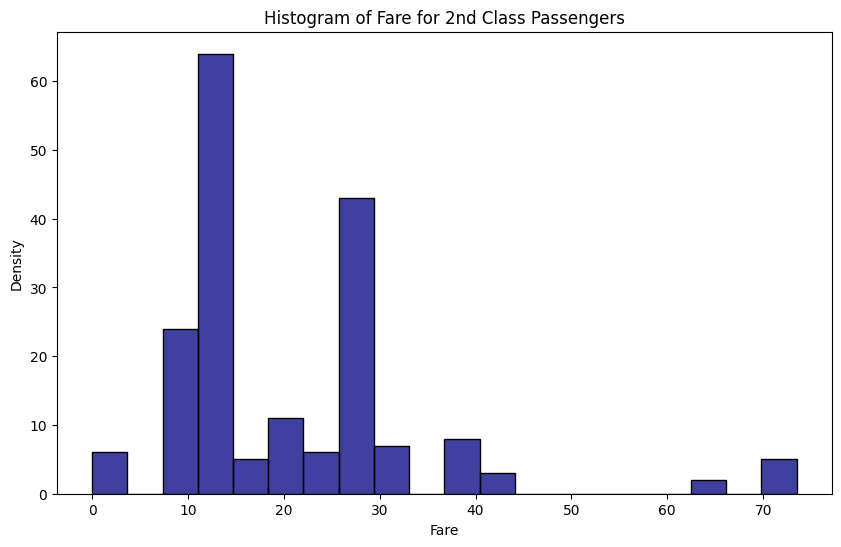

In [ ]:
second_class = df['Pclass'] == 2
fare_2nd_class = df[second_class]['Fare']

fare_stats_2nd_class = fare_2nd_class.describe()
print(fare_stats_2nd_class)

plt.figure(figsize=(10, 6))
sns.histplot(fare_2nd_class,  bins=20, color='navy')
plt.title('Histogram of Fare for 2nd Class Passengers')
plt.xlabel('Fare')
plt.ylabel('Density')

- It shows the stats of fare of `Pclass 3`.
- The describe() function is applied to the fare_3rd_class Series to compute descriptive statistics, such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.
- Overall, this code filters the DataFrame to isolate data related to third-class passengers, computes descriptive statistics for their fares, and generates a histogram to visualize the distribution of fares among third-class passengers.

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


Text(0, 0.5, 'Density')

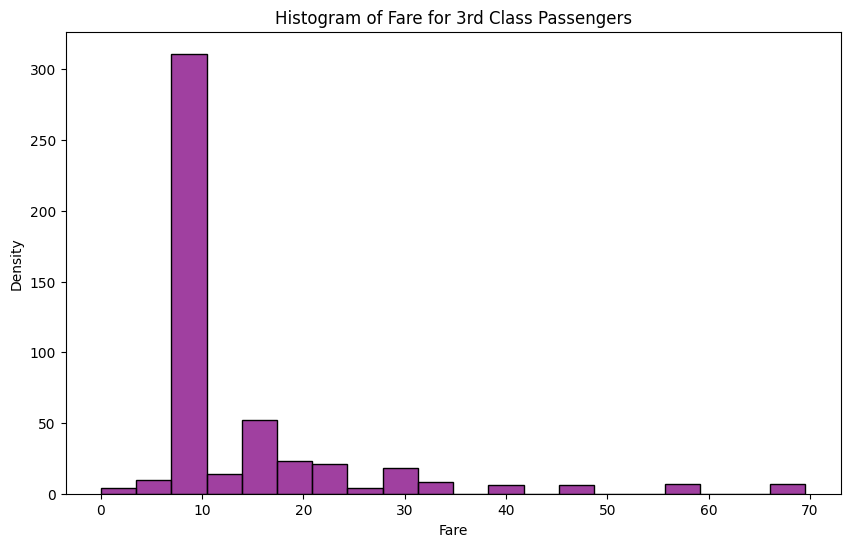

In [ ]:
third_class = df['Pclass'] == 3
fare_3rd_class = df[third_class]['Fare']

fare_stats_3rd_class = fare_3rd_class.describe()
print(fare_stats_3rd_class)

plt.figure(figsize=(10, 6))
sns.histplot(fare_3rd_class,  bins=20, color='purple')
plt.title('Histogram of Fare for 3rd Class Passengers')
plt.xlabel('Fare')
plt.ylabel('Density')

##**INSIGHT #4 + DATA VISUALIZATION**
---
- This code snippet calculates the correlation between the 'Age' and 'Fare' variables and then creates a scatter plot to visualize the relationship between passenger age and fare. The scatter plot allows us to observe any potential patterns or trends in the data and assess the strength and direction of the correlation.

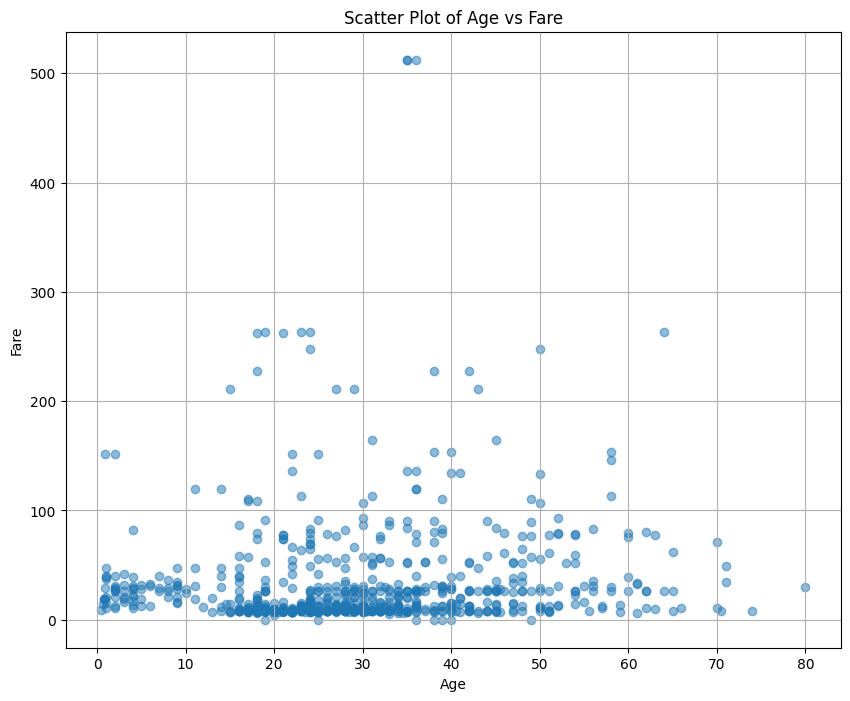

In [ ]:
age_fare_correlation = df['Age'].corr(df['Fare'])
age_fare_correlation
plt.figure(figsize=(10, 8))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

---


##**INSIGHT #5 + DATA VISUALIZATION**
---
- This shows the survival rate of different people embarked at different ports.
- df.groupby('Embarked') groups the DataFrame df by the 'Embarked' column, which represents the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
ports_embarked_survived = df.groupby('Embarked')['Survived'].value_counts()
ports_embarked_survived

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

##**DATA VISUALIZATION FOR THE ABOVE INSIGHT**
---
- Used bar graph to show the number of passengers survived embarked from different ports.

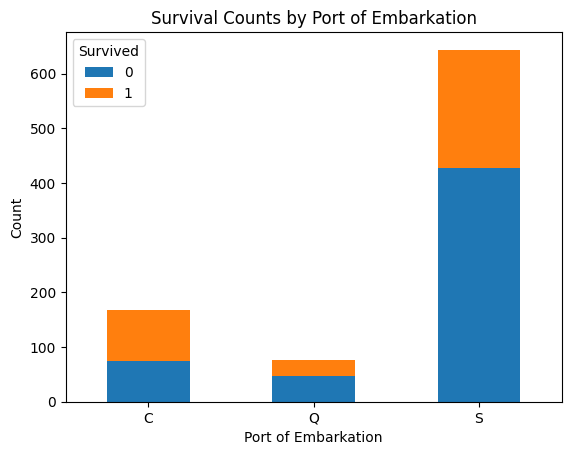

In [ ]:

ports_embarked_survived = df.groupby('Embarked')['Survived'].value_counts()

ports_embarked_survived = ports_embarked_survived.unstack()

ports_embarked_survived.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.title('Survival Counts by Port of Embarkation')
plt.xticks(rotation = 0)
# Show plot
plt.show()

##**INSIGHT #6 + DATA VISUALIZATION**
---
- Survival count based on siblings and spouses aboard.
- This count plot allows for visual comparison of the survival count for different categories of the ` SibSp ` variable, showing how the number of siblings/spouses aboard may have influenced survival rates. The hue differentiation helps to distinguish between survivors and non-survivors within each category.

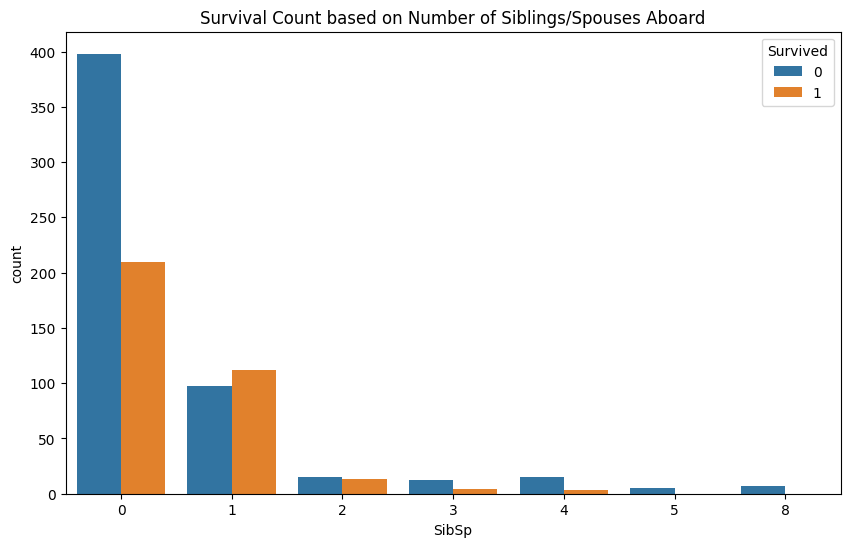

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard')
plt.show()

##**INSIGHT #7 + DATA VISUALIZATION**
---
- This histogram allows for visual comparison of the age distribution between male and female passengers. By using different colors for each gender, it's easier to observe any differences or patterns in the age distributions.

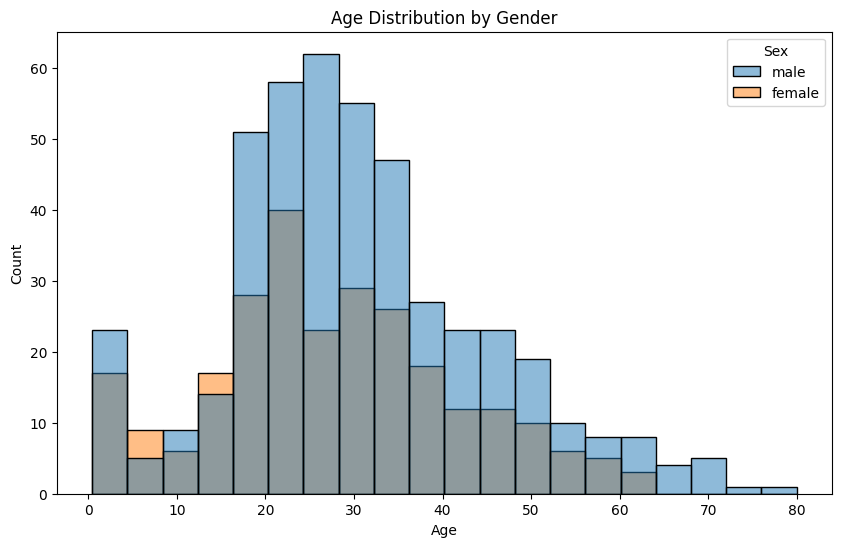

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age',  hue='Sex')
plt.title('Age Distribution by Gender')
plt.show()

##**INSIGHT #8 + DATA VISUALIZATION**
---
- This bar chart visualizes the ages of individuals in our dataset.
- Each bar represents the age of an individual at a specific record number. The height of the bar indicates the age of that individual

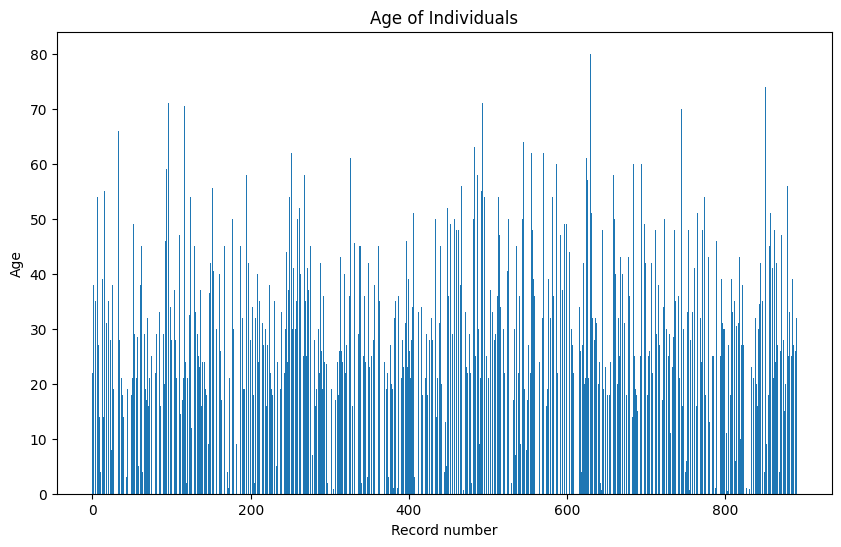

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Age'])

# Add title and labels
plt.title('Age of Individuals')
plt.xlabel('Record number')
plt.ylabel('Age')

# Display the plot
plt.show()

##**INSIGHT #9 + DATA VISUALIZATION**
---
- Overall, this bar plot provides a visual summary of the descriptive statistics for the 'Age' column, allowing for easy comparison of different statistical measures.

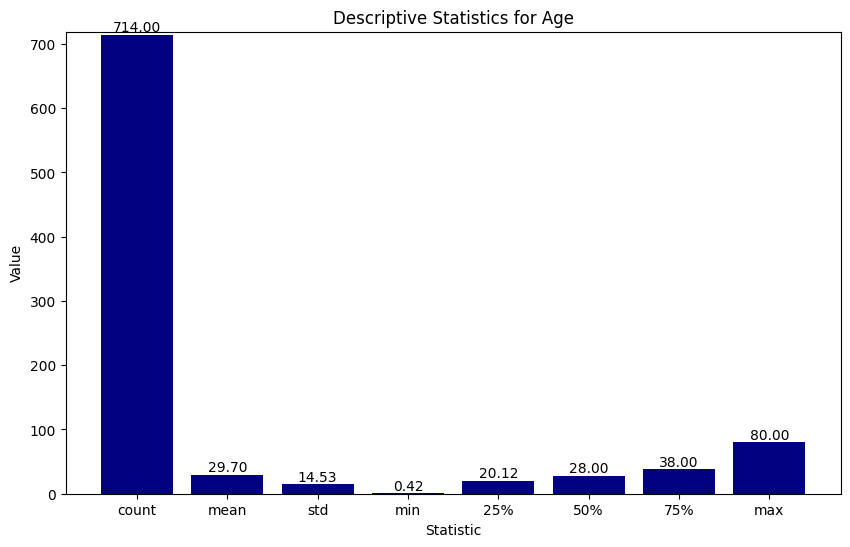

In [ ]:
mean_age = df['Age'].describe()

# Plotting
plt.figure(figsize=(10, 6))
stats_labels = mean_age.index.tolist()
stats_values = mean_age.values.tolist()
plt.bar(stats_labels, stats_values, color='navy')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Descriptive Statistics for Age')
plt.ylim(0, max(stats_values) + 5)  # Adjust y-axis limit for better visualization
for i, value in enumerate(stats_values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom')
plt.show()

##**LINEAR REGRESSION**
---


In [ ]:
my_array = np.array(["Pclass", "Survived"])
y_label= df['Survived'].tolist()
Xlabel = df['Pclass'].tolist()

print(Xlabel)
print(y_label)

[3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 1, 

In [ ]:
X = df[['Pclass']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)


In [ ]:
print(mse)

0.20512315479125026


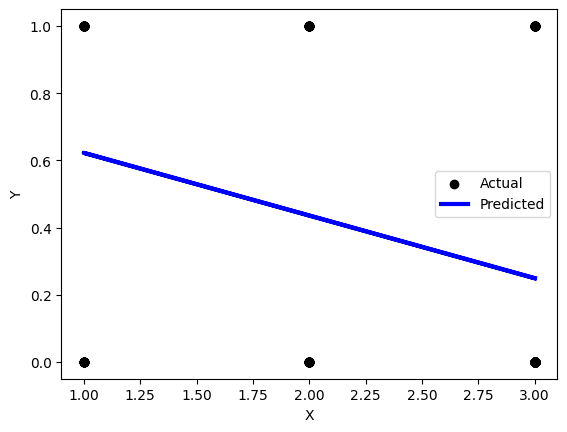

In [ ]:
plt.scatter(X_test, y_test, color='black', label="Actual")
plt.plot(X_test, y_pred, color="blue", linewidth=3, label="Predicted")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()